### Chargement des librairies

In [3]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

### Données

<function matplotlib.pyplot.show(*args, **kw)>

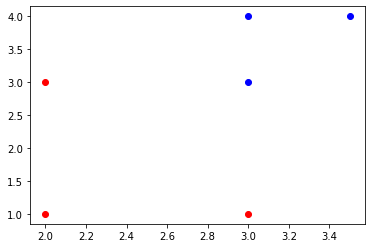

In [20]:
Xinit=np.array([[3,4],[3,3],[3.5,4],[3,1],[2,1],[2,3]])
Yinit=np.array([1,1,1,0,0,0])
n=len(Xinit)
# La fonction suivante génère 2 paquets de 100 données {(x1,x2)} et {y}
# avec y=0 ou y=1
# Xinit, Yinit = make_blobs(n_samples=300, centers=2, n_features=2, cluster_std=2)
# n=int(2*len(Xinit)/3)   # L'apprentissage se fera sur 2/3 des données
                        # On garde 1/3 des données pour tester la solution
X=Xinit[0:n]
Y=Yinit[0:n]
d=len(X[1])
mask1=(Y==0)
mask0=(Y==1)
plt.scatter(X[mask1,0],X[mask1,1],c='r') #Y=1 en rouge
plt.scatter(X[mask0,0],X[mask0,1],c='b') #Y=0 en bleu
plt.show

## Fonctions objectif et gradient

On cherche $(b,w_1,w_2)$ tel que pour chacun des points $X_i=\begin{pmatrix}X_{i1}&X_{i2}\end{pmatrix}$ et leur valeur $Y_i\in\{0,1\}$, 
$$\begin{array}{rl}
&b+w_1X_{i1}+w_2X_{i2}\simeq Y_i\\
\iff&b+\begin{pmatrix}X_{i1}&X_{i2}\end{pmatrix}\cdot \begin{pmatrix}w_1\\w_2\end{pmatrix}\simeq Y_i\\
\iff&b+X_i\cdot W-Y_i\simeq 0
\end{array}.$$
Pour ce faire, on minimise la forme quadratique :
$$\begin{array}{rl}
L(b,W)=&\frac{1}{2}\sum_{i}(b+X_i\cdot W-Y_i)^2\\
=&\frac{1}{2}(B+X\cdot W-Y)^2
\end{array}$$
où $B=\begin{pmatrix}b\\\vdots\\b\end{pmatrix}$.
On a $$\begin{array}{rl}
\frac{\partial L(b,W)}{\partial b}=&\sum_i (b+X_i\cdot W-Y_i)\times 1\\
=&\sum_i b+\sum_i (X\cdot W-Y)_i
\end{array}$$
et pour chaque $w_j$, $j\in\{1,2\}$, on a :
$$\frac{\partial L(b,W)}{\partial w_j}=\sum_i ((b+X_i\cdot W-Y_i)\times X_{ij})=(B+X\cdot W-Y)^\perp\cdot\begin{pmatrix}x_{1j}\\\vdots\\x_{nj}\end{pmatrix}$$

In [21]:
def f(b,W):
    B=[b for i in range(n)]
    return 0.5*np.dot(np.transpose(B+np.dot(X,W)-np.transpose(Y)),B+np.dot(X,W)-np.transpose(Y))  
def df(b,W):
    B=[b for i in range(n)]
    D=[np.sum(B+np.dot(X,W)-np.transpose(Y))]
    for j in range(d):
     D.append(np.dot(np.transpose(B+np.dot(X,W)-np.transpose(Y)),X[:,j]))
    return D

### Algorithme

In [22]:
def descente(gradf,b=0,W=[1,1],tau=0.0001,tolerance=1e-6,Nbiterations=1000):
    L=[]
    for i in range(Nbiterations):
        g = gradf(b,W)
        if g[0]**2+g[1]**2+g[2]**2< tolerance:
            print('L\'algorithme a convergé.\n Solution atteinte:\n b=',b,'\n W=',W)
            return L        
        L.append([b,W])
        b=b-tau*g[0]
        W=[W[0]-tau*g[1],W[1]-tau*g[2]]
    print('L\'algorithme n\'a pas convergé.\n Solution atteinte:\n b=',b,'\n W=',W)
    return L

### Calcul de la solution

In [23]:
Xi=descente(df,0.5,[0,1],1e-4,1e-8,100000)

L'algorithme n'a pas convergé.
 Solution atteinte:
 b= -1.0619289666718361 
 W= [0.34213703982000643, 0.235642930654819]


### Représentation graphique de l'algorithme et de la solution

<ipython-input-24-23d6be1f14aa>:8: UserWarning: No contour levels were found within the data range.
  plt.contour(x1_values,x2_values,fct_values,levels=[0.5],colors=['g'],alpha=0.1+0.899*i/(len(Xi)-1))


<function matplotlib.pyplot.show(*args, **kw)>

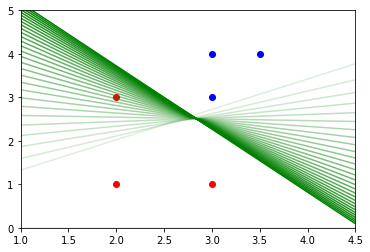

In [24]:
plt.scatter(X[mask1,0],X[mask1,1],c='r')
plt.scatter(X[mask0,0],X[mask0,1],c='b')
x1_values=np.linspace(np.min(X[:,0])-1,np.max(X[:,0])+1,20)
x2_values=np.linspace(np.min(X[:,1])-1,np.max(X[:,1])+1,20)
for i in np.linspace(0,len(Xi)-1,30):
    S=Xi[i.astype(int)]
    fct_values = np.array([[S[0]+S[1][0]*x1+S[1][1]*x2 for x1 in x1_values] for x2 in x2_values])
    plt.contour(x1_values,x2_values,fct_values,levels=[0.5],colors=['g'],alpha=0.1+0.899*i/(len(Xi)-1))
plt.show

## Validation du modèle

Erreur moyenne : 0.17


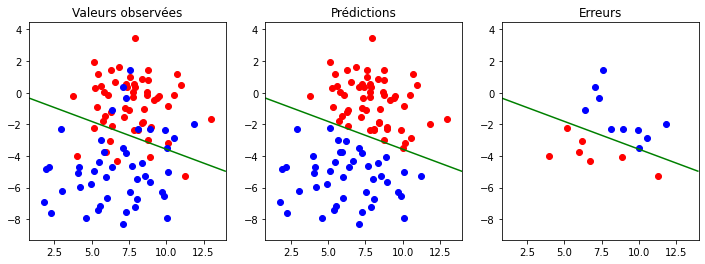

In [19]:
S=Xi[len(Xi)-1]
Xv=Xinit[n:len(Xinit)]
Yv=Yinit[n:len(Yinit)]

# Données observées
maskv1=[Yv[i]==1 for i in range(len(Yv))]
maskv0=[Yv[i]==0 for i in range(len(Yv))]

# Prédictions de la solution
maskp1=[S[0]+S[1][0]*Xv[i][0]+S[1][1]*Xv[i][1]>=0.5 for i in range(len(Xv))]
maskp0=[S[0]+S[1][0]*Xv[i][0]+S[1][1]*Xv[i][1]<0.5 for i in range(len(Xv))]

# Erreurs
maske1=[(maskv1[i]==True and maskp1[i]==False) for i in range(len(maskv1))]
maske0=[(maskv0[i]==True and maskp0[i]==False) for i in range(len(maskv0))]

# Représentation graphique de la solution
x1_values=np.linspace(np.min(Xv[:,0])-1,np.max(Xv[:,0])+1,20)
x2_values=np.linspace(np.min(Xv[:,1])-1,np.max(Xv[:,1])+1,20)
fct_values = np.array([[S[0]+S[1][0]*x1+S[1][1]*x2 for x1 in x1_values] for x2 in x2_values])

plt.figure(figsize=(12,4)) #créer une figure

plt.subplot(1,3,1) #créer des sous-graphe : 1 ligne, 2 colonnes, et selectionne le 1er graphe pour la suite
plt.scatter(Xv[maskv1,0],Xv[maskv1,1],c='r')
plt.scatter(Xv[maskv0,0],Xv[maskv0,1],c='b')
plt.contour(x1_values,x2_values,fct_values,levels=[0.5],colors=['g'],alpha=1)
plt.title('Valeurs observées')

plt.subplot(1,3,2)
plt.scatter(Xv[maskp1,0],Xv[maskp1,1],c='r')
plt.scatter(Xv[maskp0,0],Xv[maskp0,1],c='b')
plt.contour(x1_values,x2_values,fct_values,levels=[0.5],colors=['g'],alpha=1)
plt.title('Prédictions')

plt.subplot(1,3,3)
plt.scatter(Xv[maske1,0],Xv[maske1,1],c='r')
plt.scatter(Xv[maske0,0],Xv[maske0,1],c='b')
plt.contour(x1_values,x2_values,fct_values,levels=[0.5],colors=['g'],alpha=1)
plt.title('Erreurs')
plt.show

# Calcul du nombre d'erreurs
# np.count_nonzero retourne le nombre d'éléments non égaux à False
print("Erreur moyenne :",(np.count_nonzero(maske0)+np.count_nonzero(maske1))/len(Xv))
